In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
%matplotlib inline

In [2]:
df = pd.read_csv('pesos_y_alturas.csv')
df['Sexo'].replace(['Femenino', 'Masculino'],
                        [0, 1], inplace=True)

In [3]:
df

,Sexo,Altura,Peso
0,1,1.875714,109.721075
1,1,1.747060,73.622792
2,1,1.882397,96.497629
3,1,1.821967,99.809586
4,1,1.774998,93.598695
...,...,...,...
9995,0,1.680785,62.041210
9996,0,1.703506,77.504378
9997,0,1.622247,58.275424
9998,0,1.753470,74.322226


In [4]:
def j(x,y,theta):
    theta_sqr=np.dot(theta,theta)
    lista=[]
    for j in range(len(y)):
        h=np.dot(theta,x[j])
        lista.append((h-y[j])*(h-y[j]))
    jf=np.mean(lista)/2
    return jf

def grad(x,y,theta,eta):
    gradiente=[]
    for i in range(len(theta)):
        lista=[]
        for j in range(len(y)):
            h=np.dot(theta,x[j])
            lista.append((h-y[j])*x[j][i])
        gradiente.append(eta*np.mean(lista))
    return gradiente

def reg_desc_grad(x,y,eta,theta):
    lista_thetas=[]
    resta=1
    while(resta>=.0001):
        theta2 = theta
        theta = theta2-grad(x,y,theta2,eta)
        lista_thetas.append(theta)
        j0=j(x,y,theta2)
        j1=j(x,y,theta)
        resta=abs(j1-j0)
    return theta, lista_thetas

In [5]:
alturas=np.array(list(df['Altura']))
mediaA=np.mean(alturas)
desvA=np.sqrt(np.var(alturas))
alturas_norm=(alturas-mediaA)/desvA

pesos=np.array(list(df['Peso']))
n = alturas.shape[0]
alturas_norm = alturas_norm.reshape(-1, 1)
alturas=alturas.reshape(-1, 1)
y= pesos.reshape(-1, 1)
sexo_nom=np.array(list(df['Sexo'])).reshape(-1, 1)
x0 = np.ones((n,1))
x2=np.hstack((x0,alturas_norm))

In [6]:
theta2, lista_thetas2=reg_desc_grad(x2,y,.1,np.array([70, 10]))

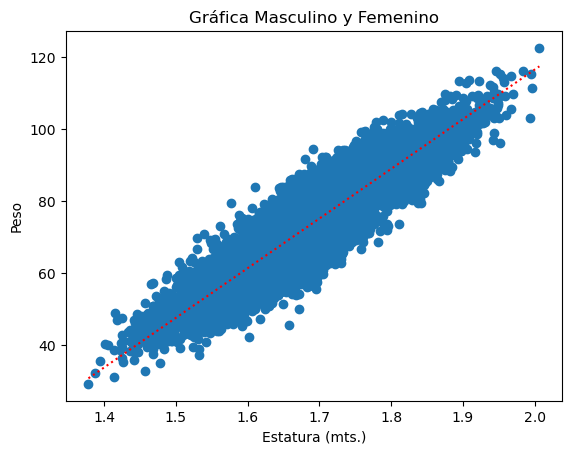

In [7]:
fig3, ax3 = plt.subplots()
ax3.scatter(alturas,y)
plt.title("Gráfica Masculino y Femenino")
plt.ylabel('Peso')
plt.xlabel('Estatura (mts.)')
h=[]
h2=np.linspace(min(alturas), max(alturas), n)
for i in range(n):
    h.append((theta2[0]-theta2[1]*mediaA/desvA)+theta2[1]/desvA*h2[i])
ax3.plot(h2,h,'r:')

In [8]:
x = np.hstack((x0,alturas_norm,sexo_nom))

In [9]:
theta, lista_thetas=reg_desc_grad(x,y,.1,np.array([65, 8,  6]))

In [10]:
theta

array([68.75359604, 10.37938439,  8.90082096])

In [11]:
dfM=df[df['Sexo']==1]
dfF=df[df['Sexo']==0]

In [12]:
alturasM = np.array(list(dfM['Altura']))
alturasM = alturasM.reshape(-1, 1)
pesosM = np.array(list(dfM['Peso']))
pesosM= pesosM.reshape(-1, 1)
nM = alturasM.shape[0]
sexoM=np.array(list(dfM['Sexo'])).reshape(-1, 1)
xM = np.hstack((pesosM,alturasM,sexoM))
minAM=min(alturasM)
maxAM=max(alturasM)
z1=np.linspace(minAM, maxAM, nM)



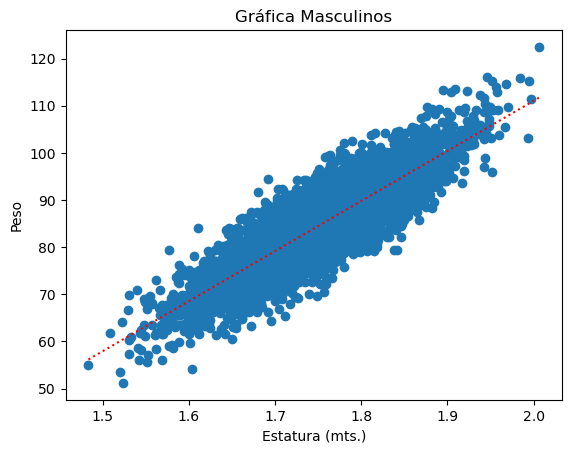

In [13]:
fig, ax = plt.subplots()
ax.scatter(xM[:,1].reshape(-1,1),xM[:,0].reshape(-1,1))
plt.title("Gráfica Masculinos")
plt.ylabel('Peso')
plt.xlabel('Estatura (mts.)')
z4=[]
for i in range(nM):
    z4.append((theta[0]-theta[1]*mediaA/desvA)+theta[1]/desvA*z1[i]+theta[2])
ax.plot(z1,z4,'r:')

In [14]:
alturasF = np.array(list(dfF['Altura']))
alturasF = alturasF.reshape(-1, 1)
pesosF = np.array(list(dfF['Peso']))
pesosF = pesosF.reshape(-1, 1)
nF = alturasF.shape[0]
sexoF = np.array(list(dfF['Sexo'])).reshape(-1, 1)
xF = np.hstack((pesosF,alturasF,sexoF))
minAF=min(alturasF)
maxAF=max(alturasF)
z2=np.linspace(minAF, maxAF, nF)

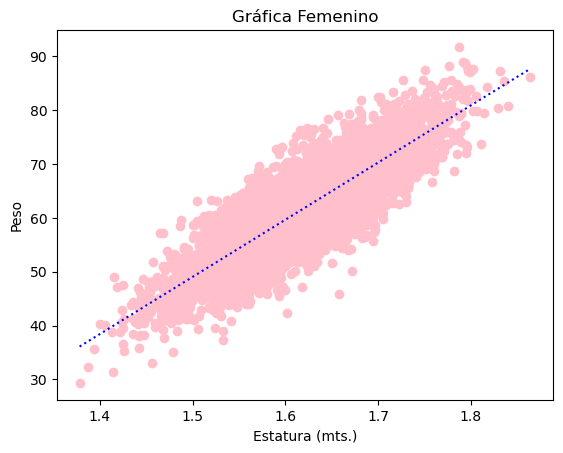

In [15]:
fig2, ax2 = plt.subplots()
ax2.scatter(xF[:,1].reshape(-1,1),xF[:,0].reshape(-1,1),c='pink')
plt.title("Gráfica Femenino")
plt.ylabel('Peso')
plt.xlabel('Estatura (mts.)')
z5=[]
for i in range(nM):
    z5.append(theta[0]-(theta[1]*mediaA/desvA)+theta[1]/desvA*z2[i])
ax2.plot(z2,z5,'b:')

In [16]:
def r_2(thetas, x, y):
    meany=np.mean(y)
    lista_aux1=[]
    lista_aux2=[]
    n=x.shape[0]
    for i in range(n):
        dot=np.dot(thetas,x[i])
        lista_aux1.append((dot-y[i][0])**2)
        lista_aux2.append((meany-y[i][0])**2)    
    return 1-(sum(lista_aux1)/sum(lista_aux2))

In [17]:
print("coeficiente de la lista dividir entre femenino y masculino es: ",r_2(theta2,x2,y))

coeficiente de la lista dividir entre femenino y masculino es:  0.855170741812762


In [18]:
print("coeficiente de la lista dividir entre femenino y masculino es: ",r_2(theta,x,y))

coeficiente de la lista dividir entre femenino y masculino es:  0.9027370558520501


In [19]:
r_2_adjusted=1-((1-r_2(theta,x,y))*(n-1)/(n-4))
print("coeficiente de la lista dividir entre femenino y masculino ajustado es: ",r_2_adjusted)


coeficiente de la lista dividir entre femenino y masculino ajustado es:  0.902707865292582
